In [1]:
%run './model/multi_corpus.py'
%run './constants.py'

import matplotlib.cm as cm

In [2]:
corpora = co_occurence_graphs(n_edges=100)
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 57 nodes and 100 edges
Geometry Graph with 61 nodes and 100 edges
Geophysics Graph with 63 nodes and 100 edges
Economics Graph with 50 nodes and 100 edges
Language & Linguistics Graph with 58 nodes and 100 edges
Probability & Statistics Graph with 58 nodes and 100 edges
Material Engineering Graph with 49 nodes and 100 edges
Artificial Intelligence Graph with 49 nodes and 100 edges
Sociology Graph with 76 nodes and 100 edges
International Business Graph with 51 nodes and 100 edges
Political Science Graph with 56 nodes and 100 edges
Genetics & Genomics Graph with 71 nodes and 100 edges
Immunology Graph with 92 nodes and 100 edges
Human Resources & Organizations Graph with 66 nodes and 100 edges
Ethnic & Cultural Studies Graph with 52 nodes and 100 edges
Neurology Graph with 46 nodes and 100 edges


In [3]:
comms = {}
with open('./link_clustering/weighted_maxS0.282472_maxD0.126154.comm2nodes.txt', 'r') as f:
    lines = f.read().split('\n')
    for line in lines:
        lst = line.split('\t')
        if lst[0] != '':
            comms[int(lst[0])] = lst[1:]

In [4]:
node2comm = defaultdict(list)
for comm_id, nodes in comms.items():
    for node in nodes:
        node2comm[node].append(comm_id)

In [26]:
G = Gs['Sociology']
# pos = nx.spring_layout(G)
pos = nx.nx_agraph.graphviz_layout(G, prog='sfdp')

xs = [v[0] for v in pos.values()]
ys = [v[1] for v in pos.values()]
max_xs = max(xs)
min_xs = min(xs)
max_ys = max(ys)
min_ys = min(ys)


pos = {node: np.array([(x - min_xs)/(max_xs - min_xs), (y - min_ys)/(max_ys - min_ys)]) for node, (x, y) in pos.items()}

pos

{'network': array([0.34357888, 0.6379351 ]),
 'social': array([0.25437466, 0.44919326]),
 'research': array([0.45634602, 0.37256164]),
 'data': array([0.36531301, 0.46357868]),
 'theory': array([0.28437492, 0.2481327 ]),
 'gender': array([0.54493251, 0.47180022]),
 'woman': array([0.52935124, 0.58866933]),
 'movement': array([0.28991005, 0.17432016]),
 'black': array([0.6549524, 1.       ]),
 'white': array([0.65496053, 0.84300218]),
 'child': array([0.39565464, 0.69071791]),
 'family': array([0.44989243, 0.64922951]),
 'income': array([0.70689811, 0.2972897 ]),
 'inequality': array([0.53962496, 0.33761784]),
 'model': array([0.37507468, 0.53274112]),
 'men': array([0.65656173, 0.57288796]),
 'state': array([0.4178358 , 0.19218637]),
 'analysis': array([0.40402642, 0.35614576]),
 'labor': array([0.69987556, 0.72028644]),
 'market': array([0.81842167, 0.80617295]),
 'group': array([0.16273206, 0.17650471]),
 'parent': array([0.49879828, 0.79363669]),
 'individual': array([0.28278997, 0.

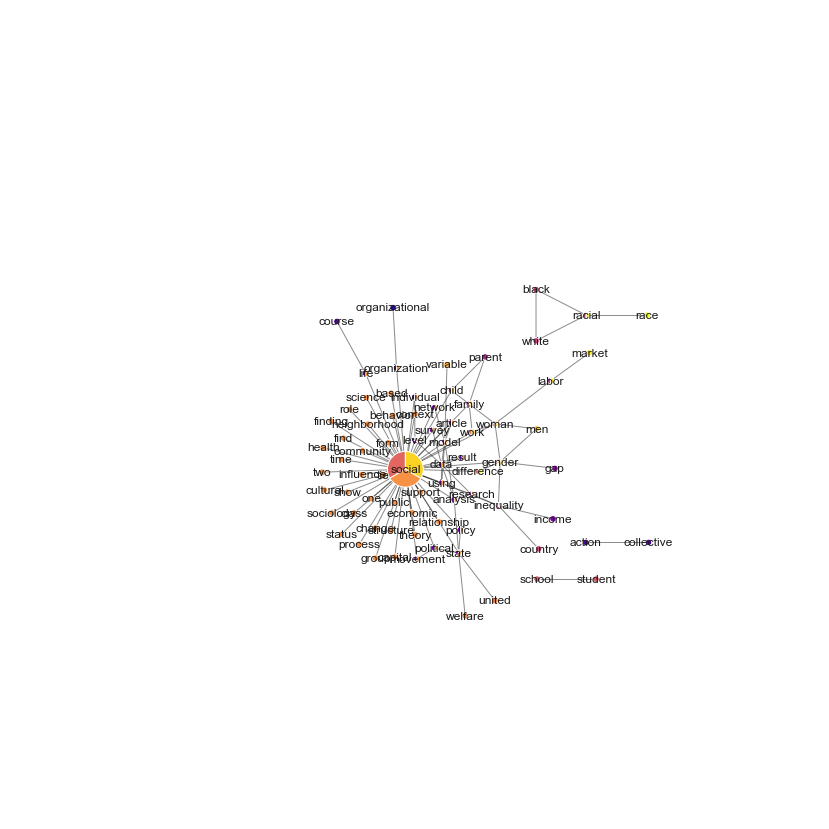

In [39]:
import numpy as np
import matplotlib.pyplot as plt

nodes = G.nodes()
node_comms = {node: node2comm[node] for node in nodes}
node_data = {node: np.full(len(node2comm[node]), 100/len(node2comm[node])) for node in nodes}

node_deg = dict(nx.degree(G))
node_sizes = {node: max(0.01, deg/1000) for node, deg in node_deg.items()}

node_labels = dict(zip(list(nodes), list(nodes)))

all_comms = set([item for sublist in node2comm.values() for item in sublist])
cmap = cm.get_cmap('plasma', len(all_comms))

colors = {node: [cmap(comm) for comm in node_comms[node]] for node in nodes}

# Creating plot
fig, ax = plt.subplots(1, figsize=(15, 15))

for node in nodes:
  wedges, texts = ax.pie(node_data[node],
                          center=pos[node],
                          colors = colors[node],
                          startangle = 90,
                          radius=node_sizes[node])

# Adding legend
# ax.legend(wedges, cars,
#           title ="Cars",
#           loc ="center left",
#           bbox_to_anchor =(1, 0, 0.5, 1))

# plt.setp(autotexts, size = 8, weight ="bold")
# ax.set_title("Customizing pie chart")

# show plot

nx.draw_networkx_labels(G, pos=pos, ax=ax, labels=node_labels)

nx.draw_networkx_edges(
    G, 
    pos,
    width=1.0,
    edge_color='k',
    style='solid',
    alpha=0.5,
    arrowsize=10,
    ax=ax,
    node_size=node_sizes,
    node_shape='o',
    connectionstyle='arc3',
).set_zorder(-1)

ax.grid(False)
ax.set_facecolor('white')

plt.show()

In [20]:
communities=True

# for field_name, G in Gs.items():

fig, ax = plt.subplots(1, figsize=(15, 15))

node_deg = dict(nx.degree(G))
node_names = list(node_deg.keys())
node_sizes = list(map(lambda deg: deg*200, node_deg.values()))
node_labels = dict(zip(node_names, node_names))

cmap = cm.get_cmap('plasma', len(all_comms))

pos = nx.nx_agraph.graphviz_layout(G, prog='sfdp') # dot, twopi, fdp, sfdp, circo
print(pos)

for node, node_comms in node2comm.items():
    a = ax.pie(
        np.full(len(node_comms), 100/len(node_comms)),
        center=pos[node],
        colors = [cmap(a) for a in node_comms],
        radius=node_deg[node]/100
        # ax=ax
    )

# nx.draw_networkx_nodes(
#     G, 
#     pos,
#     nodelist=node_names,
#     node_size=node_sizes,
#     # node_color='#00ABB3',
#     node_color=node_color,
#     node_shape='o',
#     alpha=None,
#     cmap=plt.cm.Blues,
#     ax=ax,
#     linewidths=1.0,
#     edgecolors='k',
# ).set_zorder(1)

nx.draw_networkx_labels(G, pos=pos, ax=ax, labels=node_labels)

nx.draw_networkx_edges(
    G, 
    pos,
    width=1.0,
    edge_color='k',
    style='solid',
    alpha=0.5,
    arrowsize=10,
    ax=ax,
    nodelist=node_names,
    # node_size=50000,
    node_size=node_sizes,
    node_shape='o',
    connectionstyle='arc3',
).set_zorder(-1)

ax.grid(False)

# plt.savefig(
#     os.path.join(LATEX_FIGURES_PATH, 'co_occurrence_graphs', f'{field_name.capitalize()}.png'), 
#     transparent=True, 
#     dpi=150 
# )

plt.show()

ValueError: Image size of 401303x359843 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x1080 with 1 Axes>